In [805]:
import pandas as pd
import os
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt

# Parameters wanted:
   *  Mass, radius, orbital period, host star metallicity, eccentricity, equilibrium temperature.

In [173]:
file_US="/home/bolacha/University/Project/code/data2-example/selection_US.rdb"
file_EU="/home/bolacha/University/Project/code/data2-example/selection_EU.rdb"

In [744]:
file1=pd.read_csv(file_US, sep = '\t',header=[2])
file2=pd.read_csv(file_EU, sep = '\t',header=[2])
d_US, d_EU = pd.DataFrame(file1), pd.DataFrame(file2)
d_US,d_EU = d_US.iloc[1:,:45], d_EU.iloc[1:,:45]
d_US, d_EU = d_US.astype(float), d_EU.astype(float)

d_US.rename(columns={"null": "Name", "null.1": "DB source", "null.2": "Discovery Method", "JUPITERMASS" : "Mp", "JUPITERMASS.1": "Mp_sini", "JUPITERRADIUS": "Rp", "DAY": "P", "AU":"a","null.3":"e","KELVIN":"Tstar", "null.4":"FeH","DEG":"i" },inplace=True)
d_EU.rename(columns={"null": "Name", "null.1": "DB source", "null.2": "Discovery Method", "JUPITERMASS" : "Mp", "JUPITERMASS.1": "Mp_sini", "JUPITERRADIUS": "Rp", "DAY": "P", "AU":"a","null.3":"e","KELVIN":"Tstar", "null.4":"FeH","DEG":"i"},inplace=True)

In [754]:
d_US=d_US[['Name','DB source', 'Discovery Method', 'Mp', 'Mp_sini', 'Rp','P','a','e','Tstar','FeH','i']]
d_US
#masses are in relation to Jupiter's mass, radius in relation to Jupiter's radius"
#Orbital period is is days, a in AU, i in degrees

,Name,DB source,Discovery Method,Mp,Mp_sini,Rp,P,a,e,Tstar,FeH,i
1,CoRoT-12 b,Nasa Exoplanet Archive,Transit,0.917,NaN,1.44,2.828042,0.04016,0.07,5675.0,0.16,85.48
2,CoRoT-18 b,Nasa Exoplanet Archive,Transit,3.47,NaN,1.31,1.9000693,0.0295,0.08,5440.0,-0.10,86.50
3,HD 4208 b,Nasa Exoplanet Archive,Radial Velocity,0.81,0.81,NaN,832.97,1.662,0.042,5717.0,-0.28,NaN
4,HD 4313 b,Nasa Exoplanet Archive,Radial Velocity,1.927,1.927,NaN,356.21,1.157,0.147,4943.0,NaN,NaN
5,HD 50499 b,Nasa Exoplanet Archive,Radial Velocity,1.636,1.636,NaN,2447.1,3.833,0.266,6102.0,0.26,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4005,Kepler-248 c,Nasa Exoplanet Archive,Transit,NaN,NaN,0.363,16.239494,0.123,NaN,5190.0,NaN,NaN
4006,HD 34445 e,Nasa Exoplanet Archive,Radial Velocity,0.0529,0.0529,NaN,49.175,0.2687,0.09,5879.0,0.18,NaN
4007,HD 114783 c,Nasa Exoplanet Archive,Radial Velocity,0.611,0.611,NaN,4319,NaN,0,5135.0,0.21,NaN
4008,HR 858 b,Nasa Exoplanet Archive,Transit,NaN,NaN,0.186,3.58599,0.048,0.3,6201.0,-0.14,85.50


# Task 1: mass-period graph
We first need to deal with the NaNs.

In [774]:
def removenans(p1,typ=float):
    "returns NaN-free parameter tuple and its indexes on the original list"
    l=np.array([])
    for i in range(1,len(p1)):
        if (type(p1[i])!=typ): #for some reason i've been getting errors with np.where
            l=np.append(l,i)  #this does the trick but I'm aware it is inefficient
    return p1[l], l 

def compare_parameters(p1,p2):
    "return two NaN-free parameters for the same planets"
    p1, ind1 = removenans(p1)
    p2, ind2 = removenans(p2)
    l=np.array([])
    for i,index1 in enumerate(ind1):   #same thing :(
        for j, index2 in enumerate(ind2):
           if index1==index2:
            l=np.append(l,index1)
    return p1[l],p2[l]

M_US,P_US = compare_parameters(pd.to_numeric(d_US.Mp),pd.to_numeric(d_US.P))
M_EU, P_EU = compare_parameters(pd.to_numeric(d_EU.Mp), pd.to_numeric(d_EU.P))
print("Max M_US",np.max(M_US),"Max P_US",np.max(P_US))
print("Max M_EU",np.max(M_EU),"Max P_EU",np.max(P_EU))

Max M_US 55.59 Max P_US 7300000.0
Max M_EU 81.9 Max P_EU 730000.0


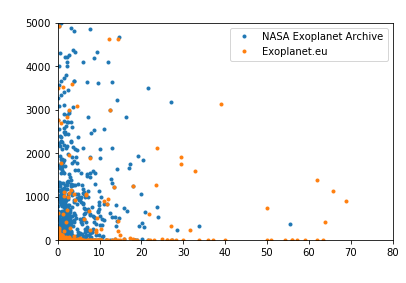

In [803]:
plt.plot(M_US, P_US, '.',label = "NASA Exoplanet Archive")
plt.plot(M_EU, P_EU, '.',label = "Exoplanet.eu")
plt.xlabel(r"$M/M_J$",color="white")
plt.xlim(0,80)
plt.ylim(0,5000)
plt.ylabel(r"$P (days)$",color="white")
plt.legend()
plt.title("Mass-Period, broad range",color="white")
plt.show()

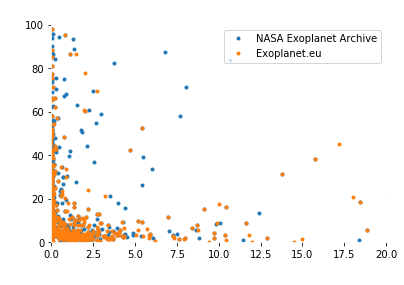

In [806]:
plt.plot(M_US, P_US, '.',label = "NASA Exoplanet Archive")
plt.plot(M_EU, P_EU, '.',label = "Exoplanet.eu")
plt.xlabel(r"$M/M_J$",color="white")
plt.xlim(0,20)
plt.ylim(0,100)
plt.ylabel(r"$P (days)$",color="white")
plt.legend()
plt.title(r"Mass-Period, for P $\leq$ 100 d, M $\leq 20 M_J$", color="white")
plt.show()

# 2nd task: mass-radius-temperature

For a first trial, for the first categories listed we will need $M_p$, $R_p$ e, a, P, [Fe/H], $T_{eq}$.
To calculate $T_{eq}$, one needs a further parameter, the planet's bond Albedo $A_B$:
\begin{equation}
T_{e q}=T_{\text {star}} \sqrt{\frac{R}{2 a}}\left(1-A_{B}\right)^{1 / 4}
\end{equation}


In [787]:
M_US,R_US = compare_parameters(pd.to_numeric(d_US.Mp),pd.to_numeric(d_US.Rp))
M_EU, R_EU = compare_parameters(pd.to_numeric(d_EU.Mp), pd.to_numeric(d_EU.Rp))

print("Max M_US",np.max(M_US),"Max R_US",np.max(R_US))
print("Max M_EU",np.max(M_EU),"Max R_EU",np.max(R_EU))

Max M_US 55.59 Max R_US 6.9
Max M_EU 81.9 Max R_EU 6.52
